# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [21]:
data=data[['id', 'race', 'call']]
data.groupby('race').describe()

call                                             
       count      mean       std  min  25%  50%  75%  max
race                                                     
b     2435.0  0.064476  0.245650  0.0  0.0  0.0  0.0  1.0
w     2435.0  0.096509  0.295349  0.0  0.0  0.0  0.0  1.0

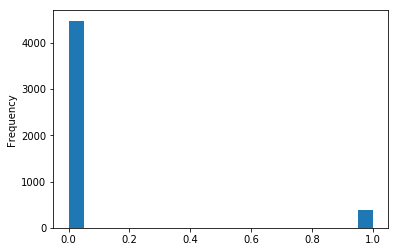

In [6]:
data.call.plot.hist(bins=20)

For this exercise I will be examining whether race has a significant impact on the rate of callbacks for resumes. The test I use to examine the impact of race on callbacks will be the t test of two independent means.  One of the main assumptions of the t test is that the mean of the sampling distribution is normally distributed.  Since we have a sample of nearly 5,000 people to conduct this analysis the central limit theorem does apply and we can assume that the sampling distribution of the mean of callbacks will approximate a normaly distribution. I also chose to use the t test over the z test in this instance because we do not have the population standard deviation.  Using a t test I will approximate the population standard deviation using the sample standard deviation.

The null and alternative hypotheses of this test are:
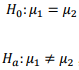

In [22]:
b=data[data.race=="b"]
b=b["call"]
w=data[data.race=="w"]
w=w["call"]

In [23]:
b.describe()

count    2435.000000
mean        0.064476
std         0.245650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [24]:
w.describe()

count    2435.000000
mean        0.096509
std         0.295349
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [26]:
#calculation of margin of error
moe=1.96*math.sqrt((np.std(b)/2435)+(np.std(w)/2435))
moe

0.029211930613530616

In [37]:
#calculation of 95% confidence interval
diff=b.mean()-w.mean()
diff

-0.032032855

In [38]:
CI=(-.032 - moe,
    -.032 + moe) 
CI

(-0.06121193061353061, -0.002788069386469385)

In [36]:
#t test for difference between two means
stats.ttest_ind(b, w)

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9408021031288859e-05)

In this exercise I examined whether race has a significant impact on the rate of callbacks for resumes. To examine this potential reason for a difference in rate of callbacks I used a two sample t test.  The confience interval around the the sample difference between group means is (-0.061, -0.002).  This confidence interval does not contain the value 0 in the null hypothesis thus we would reject the null hypothesis.  Additionally the p value is well below .05 also indicating that we would reject the null hypothesis and conclude that their is a significant difference in the mean number of callbacks that people with white sounding names and those with black sounding names.

This analysis does not mean that race/name is the most important factor in callback success. It just supports that it is one significant factor.  If we wanted to see what the most important factor was we would need to examine other variables in the dataset to see if one of those is more important or if possibly there are a combination of factors that all are influential in the rate of callbacks.